# Random Forest

In [1]:
!pip install scikit-learn matplotlib seaborn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


   age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0


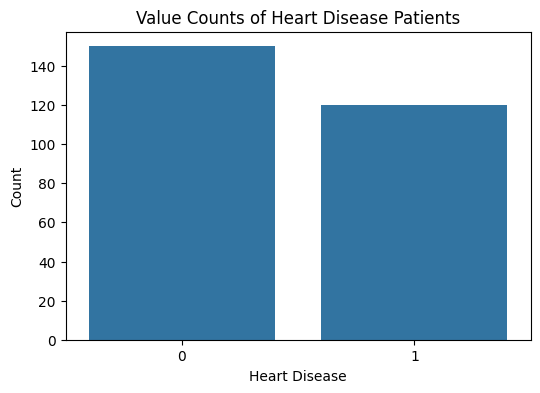

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import the dataset
df = pd.read_csv('heart_v2.csv')

# Display first 5 rows
print(df.head())

# Plot value counts of heart disease
plt.figure(figsize=(6, 4))
sns.countplot(x='heart disease', data=df)
plt.title('Value Counts of Heart Disease Patients')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()


In [3]:
# 3. Putting feature variables into X and target variable into y

# Feature variables
X = df.drop('heart disease', axis=1)

# Target variable
y = df['heart disease']


# 4. Train-Test Split is performed
# Now let's split the data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.7,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)


(189, 4) (81, 4)


In [4]:
# 5. Import RandomForestClassifier and fit the data

from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    oob_score=True
)

# Train the model
%time
classifier_rf.fit(X_train, y_train)

# Check the OOB score
# The OOB score is computed as the proportion of correctly predicted samples
classifier_rf.oob_score_


CPU times: user 4 μs, sys: 0 ns, total: 4 μs
Wall time: 6.44 μs


0.6349206349206349

In [8]:
# Make predictions on the test set
y_pred = classifier_rf.predict(X_test)

from sklearn.metrics import accuracy_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is:", accuracy)


Accuracy is: 0.654320987654321


In [14]:
# 6. Hyperparameter tuning for Random Forest using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Base model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Parameter grid
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'n_estimators': [10, 25, 30, 50, 100, 200]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=params,
    cv=4,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best results
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Evaluate best model on test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Fitting 4 folds for each of 180 candidates, totalling 720 fits
Best Parameters: {'max_depth': 2, 'min_samples_leaf': 20, 'n_estimators': 100}
Best CV Accuracy: 0.661790780141844
Test Accuracy: 0.7037037037037037


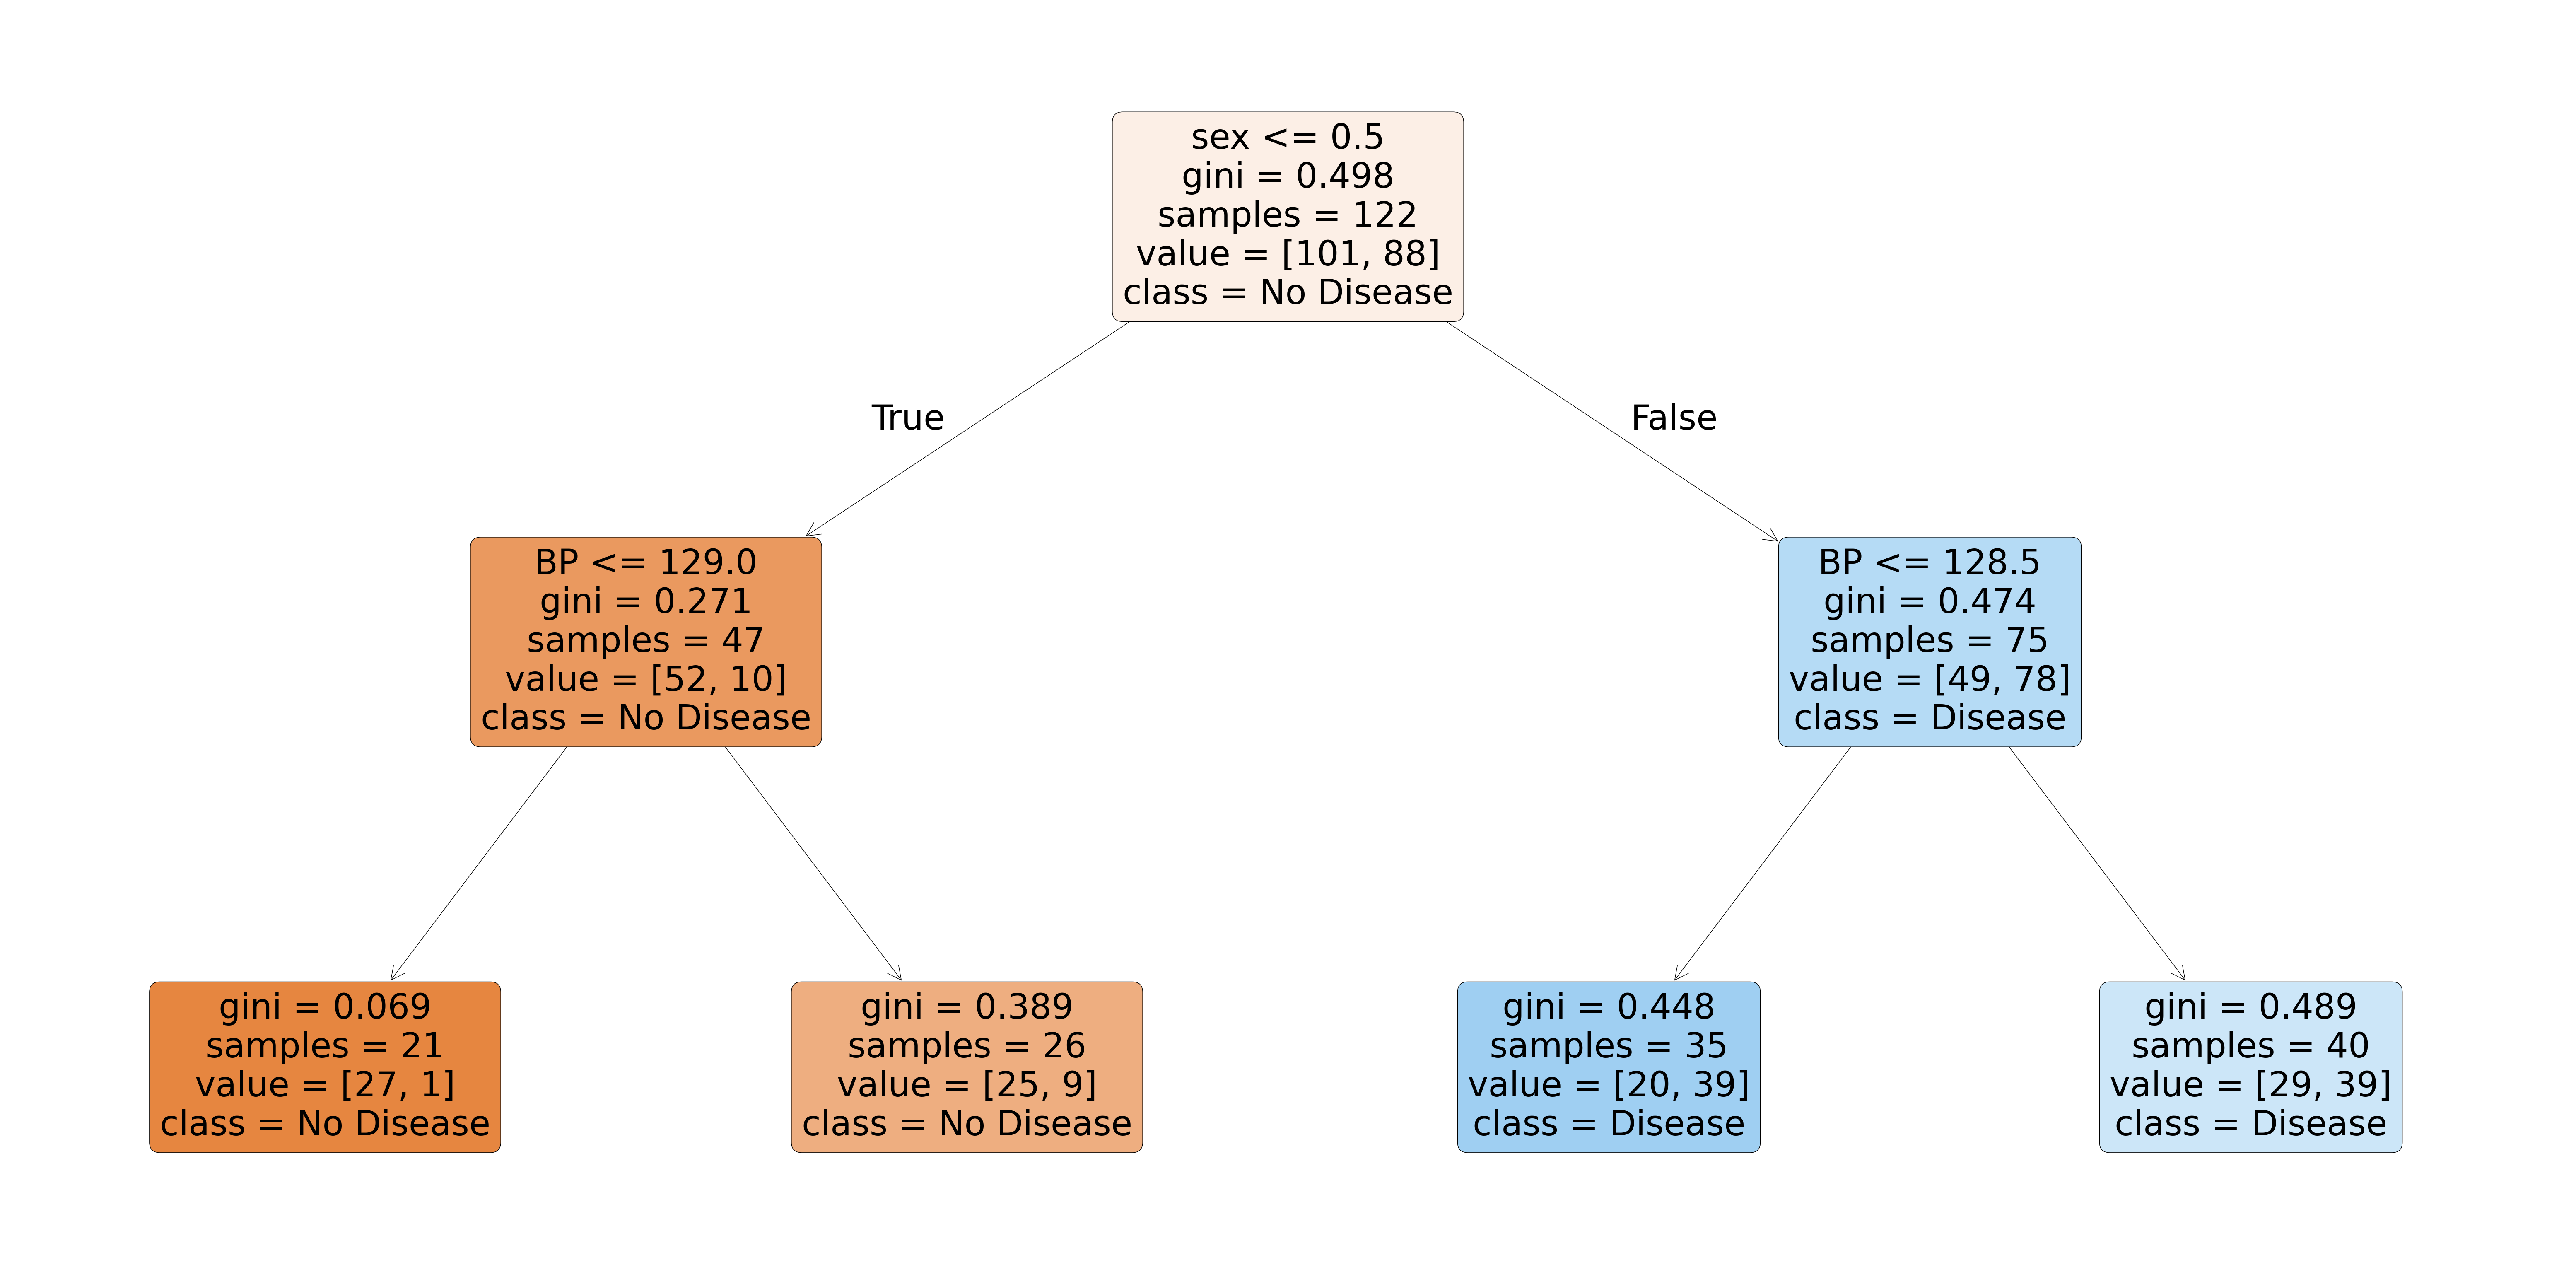

In [18]:
# 7. Visualize a tree from the Random Forest

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot one tree from the best Random Forest model
plt.figure(figsize=(80, 40))

plot_tree(
    best_model.estimators_[7],        # choose any tree index
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,                   # color nodes
    rounded=True,                  # rounded boxes
    fontsize=60
)

plt.show()



In [20]:
# 8. Sort the data using feature importance

import pandas as pd

# Create DataFrame of feature importances
imp_df = pd.DataFrame({
    'Varname': X_train.columns,
    'Imp': best_model.feature_importances_
})

# Sort by importance (descending)
imp_df = imp_df.sort_values(by='Imp', ascending=False)

# Display result
imp_df


,Varname,Imp
1,sex,0.505255
0,age,0.277024
3,cholestrol,0.154065
2,BP,0.063657


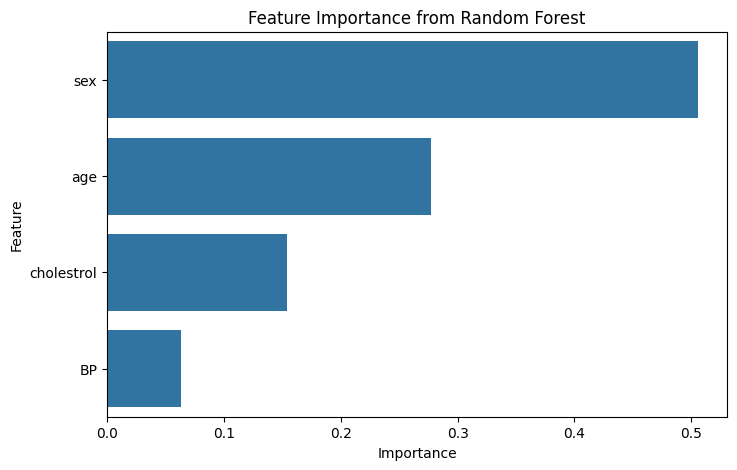

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Imp', y='Varname', data=imp_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
